# Processing of DOU masks

In [11]:
import nibabel as nib
import nilearn as nil
import numpy as np 
import sys
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial.distance import pdist

import cmbnet.preprocessing.process_masks as process_masks
from cmbnet.preprocessing.loading import get_dataset_subjects
from cmbnet.preprocessing.datasets.dou import load_DOU_raw, process_DOU_anno
import cmbnet.visualization.utils_plotting as utils_plt
import os
from typing import Tuple, List, Dict
import matplotlib.pyplot as plt


In [2]:
subject = "16"
input_dir = "/home/cerebriu/data/datasets/raw/DOU/"

sequences_raw, labels_raw, sequence_type, centersofmass = load_DOU_raw(input_dir, subject)

In [15]:
subjects = get_dataset_subjects("dou",input_dir)
subjects

['08',
 '10',
 '20',
 '13',
 '19',
 '03',
 '06',
 '09',
 '11',
 '16',
 '07',
 '14',
 '12',
 '01',
 '04',
 '18',
 '02',
 '15',
 '05',
 '17']

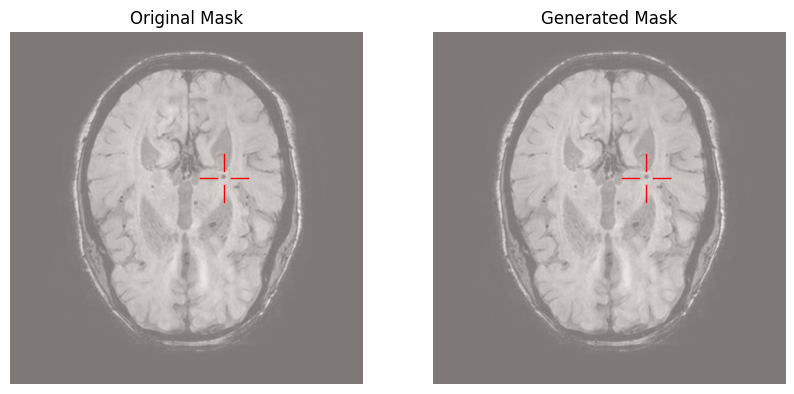

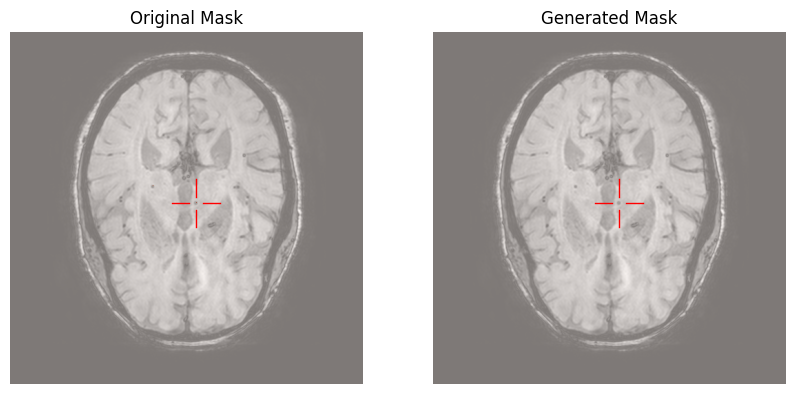

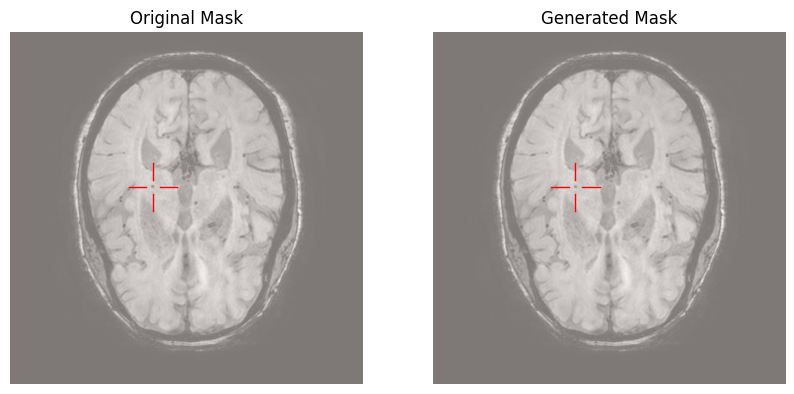

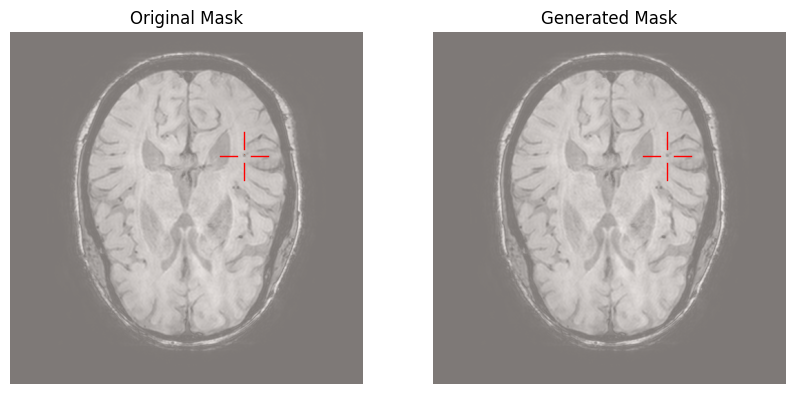

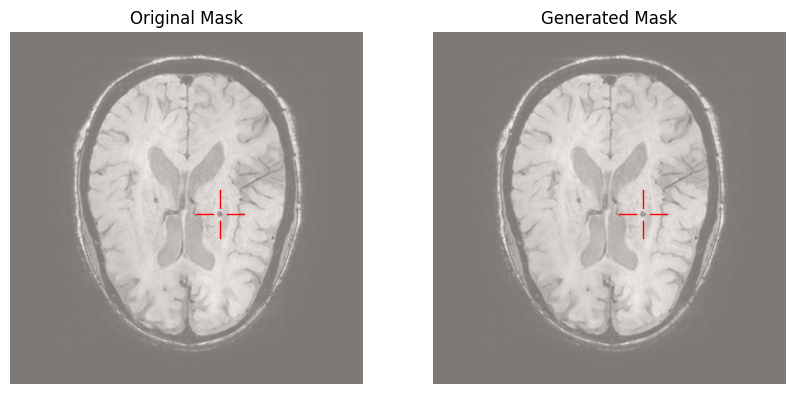

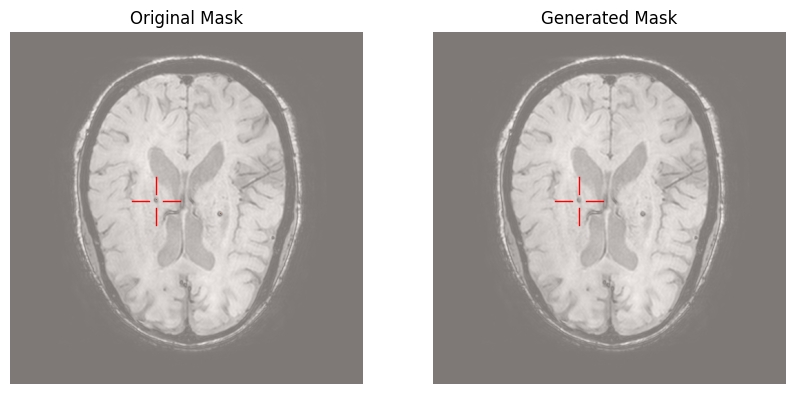

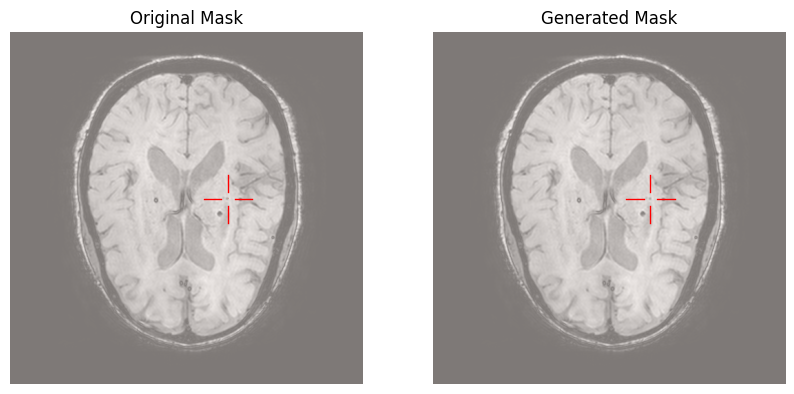

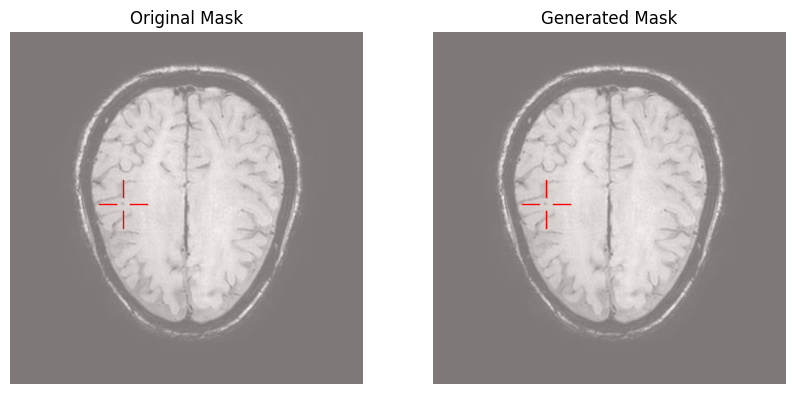

In [18]:
# results_dict = {}
# for subject in subjects:
#     print("------------------------------------------------")
#     print(subject)
#     print("------------------------------------------------")

# # Load data
# sequences_raw, labels_raw, sequence_type, centersofmass = load_DOU_raw(input_dir, subject)
# print(centersofmass)

# # Process annotations
# coms_used = centersofmass
# mri_im = sequences_raw['SWI']
# labels_processed, metadata, msg = process_DOU_anno(mri_im, coms_used, "")
# print(msg)

# Prepare data for plotting
im1 = sequences_raw['SWI'].get_fdata()
cmb1 = labels_raw['SWI'].get_fdata()

results_dict[subject] = \
    [sequences_raw, labels_raw, sequence_type, centersofmass, labels_processed, metadata, msg]
# Plotting processed masks for each center of mass
for i, CM in enumerate(centersofmass):
    utils_plt.plot_processed_mask(im1, cmb1, labels_processed.get_fdata(), CM, "SWI"
                                    
                                    )